<a href="https://colab.research.google.com/github/pratyenggodip/MachineLearningTask/blob/main/TugasWeek2/Logistic_Regression_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nama : Pratyenggo Damar Iswara Putra
*   NIM  : 1103194141
*   Tugas 2


In [5]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Connect google collab with google drive
from google.colab import drive
drive.mount ('/content/drive')

# File path in Google Drive
file_path = '/content/drive/MyDrive/DATASET/SocialNetworkAds.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Accuracy: 0.86
Confusion Matrix:
[[61  2]
 [12 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



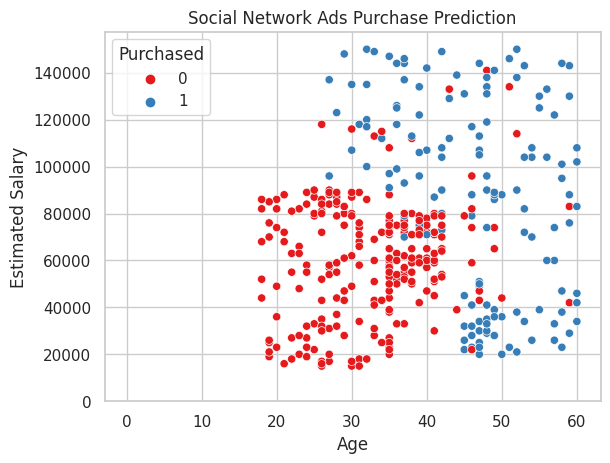

In [7]:
# Memilih fitur (independent variables) dan target (dependent variable)
# Gantilah 'fitur' dan 'target' sesuai dengan kolom yang sesuai di dataset
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menerapkan Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Visualisasi hasil dengan seaborn
sns.set(style='whitegrid')

# Scatter plot fitur dan target
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='Set1')
plt.title('Social Network Ads Purchase Prediction')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Plot decision boundary
h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.show()
